CAPSTONE TWO.

# 3. Exploratory Data Analysis (EDA)

## 3.1 Introduction

For this project we examine 22.7M approved loans from the LendingClub historical data to analyse which characteristics affect the most the loans approval, the loan terms and conditions, loan classification by grade. 
We will also review if the approved loans were paid off (fully paid and charged off)

Our goal based on our findings to predict will a borrower will pay off a loan.


## 3.2 Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from scipy import stats
# random enables us to generate random numbers
import random

## 3.3 Load the data

In [2]:
accepted = pd.read_csv('accepted_data_cleaned.csv')

C:\Users\Natalia Katchoura\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,44) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
accepted.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,10+ years,...,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,10+ years,...,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,10+ years,...,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,N
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,10+ years,...,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,3 years,...,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,N


In [4]:
accepted.tail()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
2260696,88985880,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,9 years,...,75.7,50.0,0.0,0.0,55970.0,28398.0,12300.0,42670.0,N,N
2260697,88224441,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,6 years,...,96.2,40.0,1.0,0.0,84664.0,62426.0,20700.0,58764.0,N,Y
2260698,88215728,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,10+ years,...,81.8,50.0,0.0,0.0,163804.0,44215.0,9500.0,34169.0,N,N
2260699,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2260700,Total amount funded in policy code 2: 521953170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remove last 2 row

Remove two last rows which have no values. 

In [5]:
accepted = accepted.drop([accepted.iloc[-2].name, accepted.iloc[-1].name])

In [6]:
accepted.shape

(2260699, 108)

### Make a copy of the dataframe

In [7]:
acc = accepted.copy()
acc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2260699 entries, 0 to 2260698
Columns: 108 entries, id to debt_settlement_flag
dtypes: float64(87), object(21)
memory usage: 1.8+ GB


# 3.4 Feature selection

### List of all the features

In [8]:
acc.info(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2260699 entries, 0 to 2260698
Data columns (total 108 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   id                              object 
 1   loan_amnt                       float64
 2   funded_amnt                     float64
 3   funded_amnt_inv                 float64
 4   term                            object 
 5   int_rate                        float64
 6   installment                     float64
 7   grade                           object 
 8   sub_grade                       object 
 9   emp_length                      object 
 10  home_ownership                  object 
 11  annual_inc                      float64
 12  verification_status             object 
 13  issue_d                         object 
 14  loan_status                     object 
 15  pymnt_plan                      object 
 16  purpose                         object 
 17  title                     

We have 108 features: 87 - numerical and 21 categorical. Let's take a look on our features 

### Overall statistics

In [9]:
acc.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,2260668.0,15046.931228,9190.245488,500.00,8000.00,12900.00,20000.00,40000.00
funded_amnt,2260668.0,15041.664057,9188.413022,500.00,8000.00,12875.00,20000.00,40000.00
funded_amnt_inv,2260668.0,15023.437745,9192.331679,0.00,8000.00,12800.00,20000.00,40000.00
int_rate,2260668.0,13.092829,4.832138,5.31,9.49,12.62,15.99,30.99
installment,2260668.0,445.806823,267.173535,4.93,251.65,377.99,593.32,1719.83
...,...,...,...,...,...,...,...,...
tax_liens,2260563.0,0.046771,0.377534,0.00,0.00,0.00,0.00,85.00
tot_hi_cred_lim,2190392.0,178242.753744,181574.814655,0.00,50731.00,114298.50,257755.00,9999999.00
total_bal_ex_mort,2210638.0,51022.938462,49911.235666,0.00,20892.00,37864.00,64350.00,3408095.00
total_bc_limit,2210638.0,23193.768173,23006.558239,0.00,8300.00,16300.00,30300.00,1569000.00


## 3.4.1 Target feature - loan_status

The purpose of this project is to predict likely to be fully repaid or not.
So let's check the target variable - loan_status

Loan status feaure has 9 following unique values:

In [10]:
acc['loan_status'].value_counts(dropna=False)

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
NaN                                                         31
Name: loan_status, dtype: int64

There are a large number of current loans which are not relevant to our analysis, so we can remove all the data that are not 'Fully Paid' or 'Charged off' from the dataset.

In [11]:
acc = acc.loc[acc['loan_status'].isin(['Fully Paid','Charged Off'])]

In [12]:
acc.shape

(1345310, 108)

In [13]:
acc['loan_status'].value_counts(dropna=False)

Fully Paid     1076751
Charged Off     268559
Name: loan_status, dtype: int64

The number of loans reduced to 1,345,310 in total vs. initial 2,260,699 loans
We have 1,076,751 fully paid loan and 2,685,559 charged off loans

## 3.4.2 Numerical features

In [14]:
num_features = acc.select_dtypes('number').columns.values
num_features

array(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim',
       'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths',
       'avg_cur_bal', 'bc_open_to_buy

### Make Pearson correlation matrix and the highly correlated features

In [15]:
corr_matrix = acc.corr()
corr_matrix

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
loan_amnt,1.000000,0.999562,0.998567,0.141673,0.953401,0.311794,0.032057,-0.003008,0.100984,0.100983,...,-0.022199,-0.020772,0.089647,0.021673,-0.094485,0.007418,0.335855,0.276379,0.372904,0.200089
funded_amnt,0.999562,1.000000,0.999095,0.141773,0.954053,0.311701,0.032450,-0.002813,0.100126,0.100125,...,-0.022201,-0.020775,0.089647,0.021671,-0.094292,0.007547,0.335854,0.276378,0.372911,0.200085
funded_amnt_inv,0.998567,0.999095,1.000000,0.141977,0.953064,0.311398,0.033332,-0.002531,0.099091,0.099090,...,-0.022215,-0.020791,0.089661,0.021621,-0.093945,0.007777,0.335883,0.276386,0.372944,0.200089
int_rate,0.141673,0.141773,0.141977,1.000000,0.153916,-0.072245,0.146886,0.048311,-0.405367,-0.405364,...,0.026727,0.208287,-0.063520,0.251178,0.058906,0.011823,-0.119000,0.003641,-0.229693,-0.004198
installment,0.953401,0.954053,0.953064,0.153916,1.000000,0.302499,0.035796,0.006469,0.050983,0.050983,...,-0.016670,-0.000415,0.072059,0.041110,-0.086559,0.014399,0.303059,0.261025,0.340731,0.185354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tax_liens,0.007418,0.007547,0.007777,0.011823,0.014399,0.037802,-0.023050,0.011211,-0.057847,-0.057846,...,0.002163,0.016857,-0.033913,-0.018514,0.035844,1.000000,-0.001580,-0.002017,-0.024984,0.005964
tot_hi_cred_lim,0.335855,0.335854,0.335883,-0.119000,0.303059,0.411350,0.014400,0.058158,0.196962,0.196963,...,0.005856,0.088271,0.025665,-0.018066,-0.107866,-0.001580,1.000000,0.507678,0.397174,0.400462
total_bal_ex_mort,0.276379,0.276378,0.276386,0.003641,0.261025,0.316942,0.226226,0.031898,0.032837,0.032835,...,0.015697,0.119791,0.063870,0.061256,-0.078054,-0.002017,0.507678,1.000000,0.285931,0.872653
total_bc_limit,0.372904,0.372911,0.372944,-0.229693,0.340731,0.270171,0.026524,-0.075716,0.375054,0.375054,...,-0.058701,0.042173,0.215085,-0.215062,-0.154067,-0.024984,0.397174,0.285931,1.000000,0.117488


For the model to be stable enough,it is advised that we keep only one feature in the dataset if two features are highly correlated.

### Identify Highly Correlated Features

In [16]:

corr_matrix = corr_matrix.abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater or equal 0.9
to_drop = [column for column in upper.columns if any(upper[column] >= 0.9)]
to_drop

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'fico_range_high',
 'total_pymnt_inv',
 'total_rec_prncp',
 'collection_recovery_fee',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_il_high_credit_limit']

#### Drop Highly Correlated Features

In [17]:
# Drop features 
acc.drop(acc[to_drop], axis=1, inplace=True)


#### Check for any remaining null values.

In [18]:
acc.isnull().sum().sort_values(ascending = False)

next_pymnt_d                      1345310
mths_since_recent_bc_dlq          1026290
mths_since_last_major_derog        991560
mths_since_recent_revol_delinq     895348
il_util                            880294
                                   ...   
initial_list_status                     0
total_acc                               0
revol_bal                               0
pub_rec                                 0
id                                      0
Length: 96, dtype: int64

The loan amount records with missing value are useless. Remove them 

In [19]:
acc.dropna(subset=['loan_amnt'], inplace=True)

In [20]:
missing = pd.concat([acc.isnull().sum(), 100 * acc.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
next_pymnt_d,1345310,100.000000
mths_since_recent_bc_dlq,1026290,76.286506
mths_since_last_major_derog,991560,73.704945
mths_since_recent_revol_delinq,895348,66.553285
il_util,880294,65.434287
...,...,...
last_pymnt_amnt,0,0.000000
last_fico_range_high,0,0.000000
last_fico_range_low,0,0.000000
policy_code,0,0.000000


We still have somer features with missing over 50% of its values

In [21]:
pct_null = acc.isnull().sum() / len(acc)
pct_null = pct_null[pct_null >= 0.50]
missing_feature_50pct = pct_null.index
missing_feature_50pct


Index(['mths_since_last_delinq', 'next_pymnt_d', 'mths_since_last_major_derog',
       'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m', 'mths_since_recent_bc_dlq',
       'mths_since_recent_revol_delinq'],
      dtype='object')

Based on Lending Club data dictionary https://resources.lendingclub.com/LCDataDictionary.xlsx 
most of them are irrelevant or unknown by the time of a loan. So we can drop them


In [22]:
acc.drop(missing_feature_50pct, axis=1, inplace=True)

In [23]:
num_f = acc.select_dtypes('number').columns.values
len(num_f)

57

#### Remove features with low variance.

Remove all features whose variance doesn’t meet some threshold.

In [24]:
from sklearn.feature_selection import VarianceThreshold

threshold_n=0.95
acc_t = acc[num_f]
sel = VarianceThreshold(threshold=(threshold_n* (1 - threshold_n) ))
sel_var=sel.fit_transform(acc_t)
acc_t[acc_t.columns[sel.get_support(indices=True)]].head().T

,0,1,2,4,5
loan_amnt,3600.000000,24700.00,20000.000000,10400.00,11950.00000
int_rate,13.990000,11.99,10.780000,22.45,13.44000
annual_inc,55000.000000,65000.00,63000.000000,104433.00,34000.00000
dti,5.910000,16.06,10.780000,25.37,10.20000
delinq_2yrs,0.000000,1.00,0.000000,1.00,0.00000
fico_range_low,675.000000,715.00,695.000000,695.00,690.00000
inq_last_6mths,1.000000,4.00,0.000000,3.00,0.00000
open_acc,7.000000,22.00,6.000000,12.00,5.00000
pub_rec,0.000000,0.00,0.000000,0.00,0.00000
revol_bal,2765.000000,21470.00,7869.000000,21929.00,8822.00000


In [25]:
new_num_f = acc_t.columns[sel.get_support(indices=True)]
len(new_num_f)

49

57 -> 49 numerical features

In [26]:
acc_new_num = acc_t[acc_t.columns[sel.get_support(indices=True)]]
acc_new_num.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,fico_range_low,inq_last_6mths,open_acc,pub_rec,revol_bal,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit
0,3600.0,13.99,55000.0,5.91,0.0,675.0,1.0,7.0,0.0,2765.0,...,3.0,4.0,9.0,0.0,3.0,76.9,0.0,0.0,0.0,2400.0
1,24700.0,11.99,65000.0,16.06,1.0,715.0,4.0,22.0,0.0,21470.0,...,6.0,20.0,27.0,0.0,2.0,97.4,7.7,0.0,0.0,79300.0
2,20000.0,10.78,63000.0,10.78,0.0,695.0,0.0,6.0,0.0,7869.0,...,6.0,4.0,7.0,0.0,0.0,100.0,50.0,0.0,0.0,6200.0
4,10400.0,22.45,104433.0,25.37,1.0,695.0,3.0,12.0,0.0,21929.0,...,10.0,7.0,19.0,0.0,4.0,96.6,60.0,0.0,0.0,20300.0
5,11950.0,13.44,34000.0,10.20,0.0,690.0,0.0,5.0,0.0,8822.0,...,2.0,4.0,4.0,0.0,0.0,100.0,100.0,0.0,0.0,9400.0


Now when we know the low variance features remove them from our dataset

In [27]:
acc.drop(num_f, axis=1, inplace=True)
acc[new_num_f] = acc_new_num
acc.head()

,id,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit
0,68407277,36 months,C,C4,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,n,...,3.0,4.0,9.0,0.0,3.0,76.9,0.0,0.0,0.0,2400.0
1,68355089,36 months,C,C1,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,n,...,6.0,20.0,27.0,0.0,2.0,97.4,7.7,0.0,0.0,79300.0
2,68341763,60 months,B,B4,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,n,...,6.0,4.0,7.0,0.0,0.0,100.0,50.0,0.0,0.0,6200.0
4,68476807,60 months,F,F1,3 years,MORTGAGE,Source Verified,Dec-2015,Fully Paid,n,...,10.0,7.0,19.0,0.0,4.0,96.6,60.0,0.0,0.0,20300.0
5,68426831,36 months,C,C3,4 years,RENT,Source Verified,Dec-2015,Fully Paid,n,...,2.0,4.0,4.0,0.0,0.0,100.0,100.0,0.0,0.0,9400.0


## 3.4.3 Categorical features

#### List of categorical features 

In [28]:
categorical_features = acc.select_dtypes('object').columns.values
categorical_features

array(['id', 'term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d',
       'hardship_flag', 'debt_settlement_flag'], dtype=object)

In [29]:
acc[categorical_features].head().T

,0,1,2,4,5
id,68407277,68355089,68341763,68476807,68426831
term,36 months,36 months,60 months,60 months,36 months
grade,C,C,B,F,C
sub_grade,C4,C1,B4,F1,C3
emp_length,10+ years,10+ years,10+ years,3 years,4 years
home_ownership,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE,RENT
verification_status,Not Verified,Not Verified,Not Verified,Source Verified,Source Verified
issue_d,Dec-2015,Dec-2015,Dec-2015,Dec-2015,Dec-2015
loan_status,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid
pymnt_plan,n,n,n,n,n


#### Convert some categorical featurs to numeric

In [30]:
acc['emp_length'].unique()

array(['10+ years', '3 years', '4 years', '6 years', '7 years', '8 years',
       '2 years', '5 years', '9 years', '< 1 year', '1 year', nan],
      dtype=object)

In [31]:
# convert empl_lenght to num
acc['emp_length'] = acc['emp_length'].str.replace(' years','')
acc['emp_length'] = acc['emp_length'].str.replace('+','')
acc['emp_length'] = acc['emp_length'].str.replace('<  ','')
acc['emp_length'] = acc['emp_length'].str.replace(' year','')
acc['emp_length']= acc['emp_length'].fillna(0)

acc['emp_length'] = pd.to_numeric(acc['emp_length'], errors='coerce')
acc['emp_length'].value_counts()


10.0    442199
2.0     121743
3.0     107597
1.0      88494
5.0      84154
4.0      80556
0.0      78511
6.0      62733
8.0      60701
7.0      59624
9.0      50937
Name: emp_length, dtype: int64

In [32]:
acc['term'].value_counts()

 36 months    1020743
 60 months     324567
Name: term, dtype: int64

In [33]:
#convert term to num
acc['term'] = acc['term'].str.replace(' months','')
acc['term'] = pd.to_numeric(acc['term'], errors='coerce')
acc['term'].value_counts()

36    1020743
60     324567
Name: term, dtype: int64

For the furthere data create a 'Year' column with the loan issued year values

In [34]:
# convert date string to datetime 
dt_tmp=pd.to_datetime(acc['issue_d'])

# add column year (for the data analysis)
acc['year']=pd.to_datetime(dt_tmp).dt.strftime("%Y").dropna(axis=0)
acc['year'].value_counts()

2015    375545
2016    293095
2014    223102
2017    169300
2013    134804
2018     56311
2012     53367
2011     21721
2010     11536
2009      4716
2008      1562
2007       251
Name: year, dtype: int64

#### Object date value features 

According to Lending Club data dictionary https://resources.lendingclub.com/LCDataDictionary.xlsx 
the following datetime feature are irrelevant or unknown by the time of a loan


In [35]:
#acc['issue_d'] = pd.to_datetime(acc['issue_d'], infer_datetime_format=True)

dt_features = ['issue_d', # we already pull the year value from this feature so we can drop it
            'last_pymnt_d' , #won't know at time of loan
            'earliest_cr_line' ,#irrelevant
             'last_credit_pull_d' #won't know at time of loan
              ]

In [36]:
acc.drop(dt_features, axis=1, inplace=True)

#### Print the categorical columns and their associated levels.

In [37]:
dfo = acc.select_dtypes(include=['object'], exclude=['datetime'])
print(dfo.shape)
#get levels for all variables
vn = pd.DataFrame(dfo.nunique()).reset_index()
vn.columns = ['VarName', 'LevelsCount']
vn.sort_values(by='LevelsCount', ascending =False)
vn

(1345310, 15)


,VarName,LevelsCount
0,id,1345310
1,grade,7
2,sub_grade,35
3,home_ownership,6
4,verification_status,3
5,loan_status,2
6,pymnt_plan,1
7,purpose,14
8,title,61682
9,zip_code,943


#### Drop categorical features with many levels.

In [38]:
acc.drop(['id', 'zip_code', 'title'], axis=1, inplace=True)

Review other categorical features:

In [39]:
acc['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

initial_list_status  - additional data from the site that can be used to identify whether each loan was funded through the “whole” or “fractional” program, which is irrelevant to our problem

hardship_flag, pymnt_plan are constants

In [40]:
acc.drop(['hardship_flag', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)

In [41]:
acc.shape

(1345310, 60)

# 3.5 Explore The Data

#### Information on loans status

We know the number of repaid and charged off loans (see above)
Let's plot the percentage of 'Fully Paid' vs 'Charged Off' loans and how loans were distributed by loan atatus over the years

[Text(0, 0.5, '(%)')]

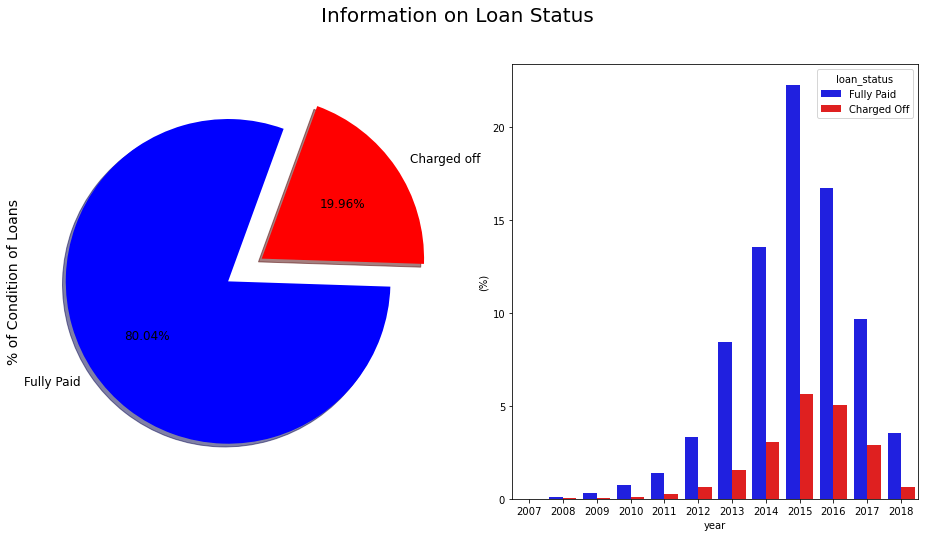

In [42]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["blue", "red"]
labels ="Fully Paid", "Charged off"

plt.suptitle('Information on Loan Status', fontsize=20)

acc["loan_status"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=acc, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
#palette = ["#3791D7", "#E01E1B"]
palette = ["blue", "red"]

sns.barplot(x="year", y="loan_amnt", hue="loan_status", data=acc, palette=palette, estimator=lambda x: len(x) / len(acc) * 100)
ax[1].set(ylabel="(%)")


Over the years more hen 80% of all loans were fully repaid

#### 'Fully Paid' and 'Charged off' loans by years

In [43]:
acc.groupby('year')['loan_status'].value_counts()

year  loan_status
2007  Fully Paid        206
      Charged Off        45
2008  Fully Paid       1315
      Charged Off       247
2009  Fully Paid       4122
      Charged Off       594
2010  Fully Paid      10049
      Charged Off      1487
2011  Fully Paid      18424
      Charged Off      3297
2012  Fully Paid      44723
      Charged Off      8644
2013  Fully Paid     113780
      Charged Off     21024
2014  Fully Paid     181941
      Charged Off     41161
2015  Fully Paid     299742
      Charged Off     75803
2016  Fully Paid     224853
      Charged Off     68242
2017  Fully Paid     130152
      Charged Off     39148
2018  Fully Paid      47444
      Charged Off      8867
Name: loan_status, dtype: int64

### 3.5.1 Approved loans features analysis

#### Analisys of characteristics that could affect the most the loans approval, the loan terms and conditions, loan classification by grade

Check if there is a dependencies between loan amounts and loan statuses. If 'Charged Off' loans have higher loan amounts

### Loan Status vs. Loan amount

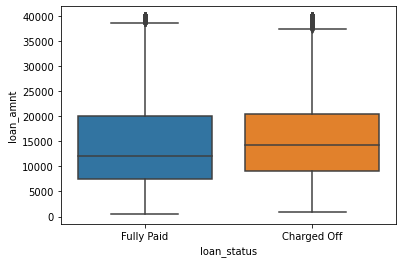

In [44]:
sns.boxplot(x= "loan_status", y="loan_amnt", data=acc)
plt.show() 

There is no significant difference in loan amounts for repaid and charges off loans.

### Loan amount distribution

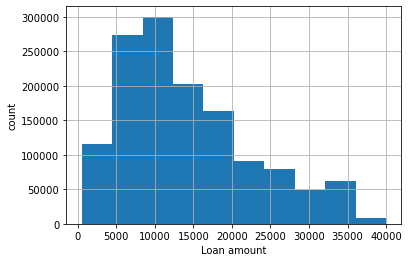

In [45]:
acc.loan_amnt.hist()
plt.xlabel('Loan amount')
plt.ylabel('count');

In [46]:
acc['loan_amnt'].mean()

14419.972013885275

Min loan amount is 1,000USD max 40,000USD with the average loan amount 14,400USD
Most of the loans are less then 20,000USD

I assume that loan astaus could depend on loan interest rate. The loans with lower rates most likely to be repaid

### Loan status vs. Interest rates

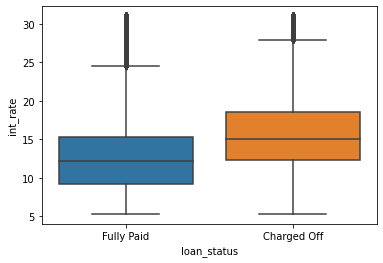

In [47]:
sns.boxplot(x= "loan_status", y="int_rate", data=acc)
plt.show() 

Our dataset contains loans with the interest rates as low as 7% and as high as 30%
According to our box plot the loans with lower interest rate more likely to be fully paid

### Loan status vs. Employment length

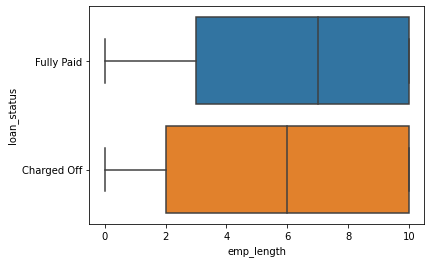

In [48]:
sns.boxplot(y= "loan_status", x="emp_length", data=acc, )
plt.show() 

The boxplot displays that there is no significant difference in loan status vs employment lengnth

### Statistisc of Employment length

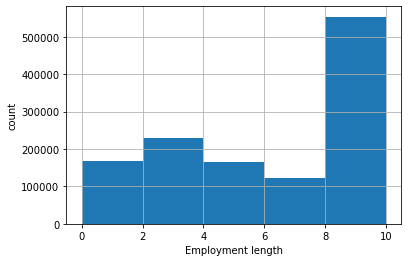

In [49]:
acc.emp_length.hist(bins=5)
plt.xlabel('Employment length')
plt.ylabel('count');

Most of the borrowers have more then 8 years of employment lenght. That is explains the previous boxplot

### Average Interest rate by Credit Score

Let's see how the loan interest rate depends on borower's credit score. The expectations are the higher a credit score the lower the interest rate

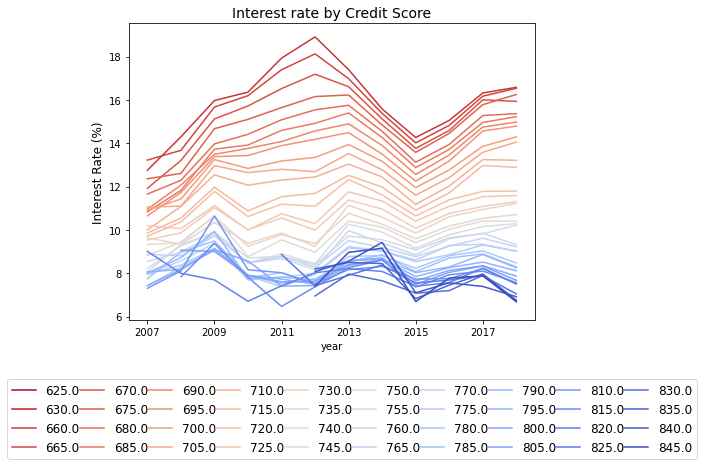

In [50]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)

cmap = plt.cm.coolwarm_r
interest_rate = acc.groupby(['year', 'fico_range_low']).int_rate.mean()
interest_rate.unstack().plot(ax=ax1, colormap=cmap)
ax1.set_title('Interest rate by Credit Score', fontsize=14)
ax1.set_ylabel('Interest Rate (%)', fontsize=12)

ax1.legend(bbox_to_anchor=(-0.3, -0.3, 1.7, 0.1), loc=0, prop={'size':12}, ncol=10, mode="expand", borderaxespad=0.)


The plot above shows thet tborowers with the higher credit score have lower interest rate

### Dependencies between the loan_status and the grade

Loan grading is a classification system that involves assigning a quality score to a loan based on a borrower's credit history, quality of the collateral, and the likelihood of repayment of the principal and interest.

We have 6 types od the grades from 'A' (highest) to 'G'(lowest).

The total number of loans by grades:

In [51]:
acc['grade'].value_counts(dropna=False, ascending = False)

B    392741
C    381686
A    235090
D    200953
E     93650
F     32058
G      9132
Name: grade, dtype: int64

### Fully paid and Charged off loans by Grades

Here is the numbers of loans that were fully repaid/charged off by grades

In [52]:
acc.groupby('grade')['loan_status'].value_counts()

grade  loan_status
A      Fully Paid     220889
       Charged Off     14201
B      Fully Paid     340172
       Charged Off     52569
C      Fully Paid     296037
       Charged Off     85649
D      Fully Paid     139899
       Charged Off     61054
E      Fully Paid      57615
       Charged Off     36035
F      Fully Paid      17567
       Charged Off     14491
G      Fully Paid       4572
       Charged Off      4560
Name: loan_status, dtype: int64

As we can see above that the ratio of higher grades (less risky) loans higher than lower grades (more risky) loans. 
Let's plot it.

### Loan statuses by Grade

Text(0.5, 1.0, 'Loan statuses by Grade')

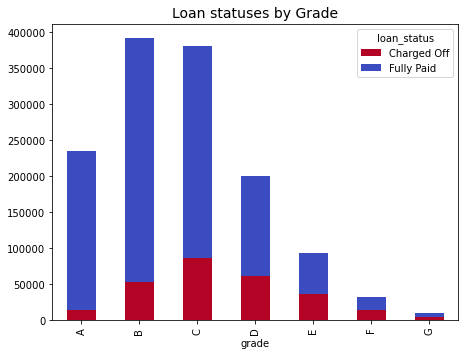

In [53]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)
cmap = plt.cm.coolwarm_r

loans_by_grade = acc.groupby(['grade', 'loan_status']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
ax1.set_title('Loan statuses by Grade', fontsize=14)


#fp_a = acc.loc[(acc['loan_status'] =='Fully Paid') & (acc['grade'] == 'A')].count()


We also expect that the interest rate will depend on the loan grade. The lower grade loans should have the higher interest rate.



### Average interest rate by Grades

Text(0, 0.5, 'Interest Rate (%)')

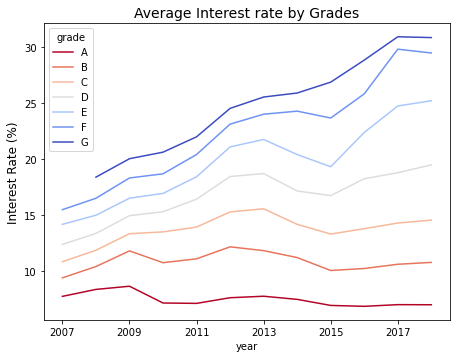

In [54]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)

cmap = plt.cm.coolwarm_r

interest_rate = acc.groupby(['year', 'grade']).int_rate.mean()
interest_rate.unstack().plot(ax=ax1, colormap=cmap)
ax1.set_title('Average Interest rate by Grades', fontsize=14)
ax1.set_ylabel('Interest Rate (%)', fontsize=12)

Comparing the loans grade 'A' and 'F' there is a bid difference in interest_rate
mean A = 7.1 vs. mean F 24.9
max A = 9.6 vs max rate F = 30.75

#### Convert classification target "loan status" to binary (Fully paid = 1, Charged off = 0).



In [55]:
acc.loc[acc['loan_status']=='Fully Paid', 'loan_status'] = 1
acc.loc[acc['loan_status']=='Charged Off', 'loan_status'] = 0

acc['loan_status'] = pd.to_numeric(acc['loan_status'])


In [56]:
#acc.corr()

#plt.figure(figsize=(16, 6))
#heatmap = sns.heatmap(acc.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
#heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);


# 3.6 Recursive feature selection

For recursive selection to work there shoudn't be NaN values in our dataset. Let's check it again.

In [57]:
missing = pd.concat([acc.isnull().sum(), 100 * acc.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
mths_since_recent_inq,174071,12.939100
emp_length,108061,8.032424
mo_sin_old_il_acct,105575,7.847634
pct_tl_nvr_dlq,67681,5.030885
avg_cur_bal,67549,5.021073
mo_sin_old_rev_tl_op,67528,5.019512
mo_sin_rcnt_rev_tl_op,67528,5.019512
num_rev_accts,67528,5.019512
num_bc_tl,67527,5.019438
total_rev_hi_lim,67527,5.019438


#### Remove all NaN rows

In [58]:
#acc.fillna(acc.mean())

acc = acc.dropna()

Get 1st 1000 rows

In [59]:
acc1000 = acc[:1000]

### Recursive feature elimination with Cross-Validation, create dummy features for object type features. 

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold


X = acc1000.drop('loan_status', axis=1)
target = acc1000['loan_status']

X = pd.get_dummies(X)

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')



In [67]:
from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X)
X_scaled=scaler.transform(X)


In [68]:
rfecv.fit(X_scaled, target)


RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=101), scoring='accuracy')

### Print optimal features

In [69]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 70


**<font color='teal'>Print out which features are considered to be least important and drop them </font>**

In [70]:
print(np.where(rfecv.support_ == False)[0])

X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)


[ 28  44  49  53  56  57  58  59  60  61  62  63  64  65  66  68  69  70
  71  72  73  74  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  97  98 101 102 103 104 105 107 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 130 131 132 133 134 136 137
 139 140 141 142 143 144 145 146 148 149 150 151 152 153 154 157]


### Plot feature importances 

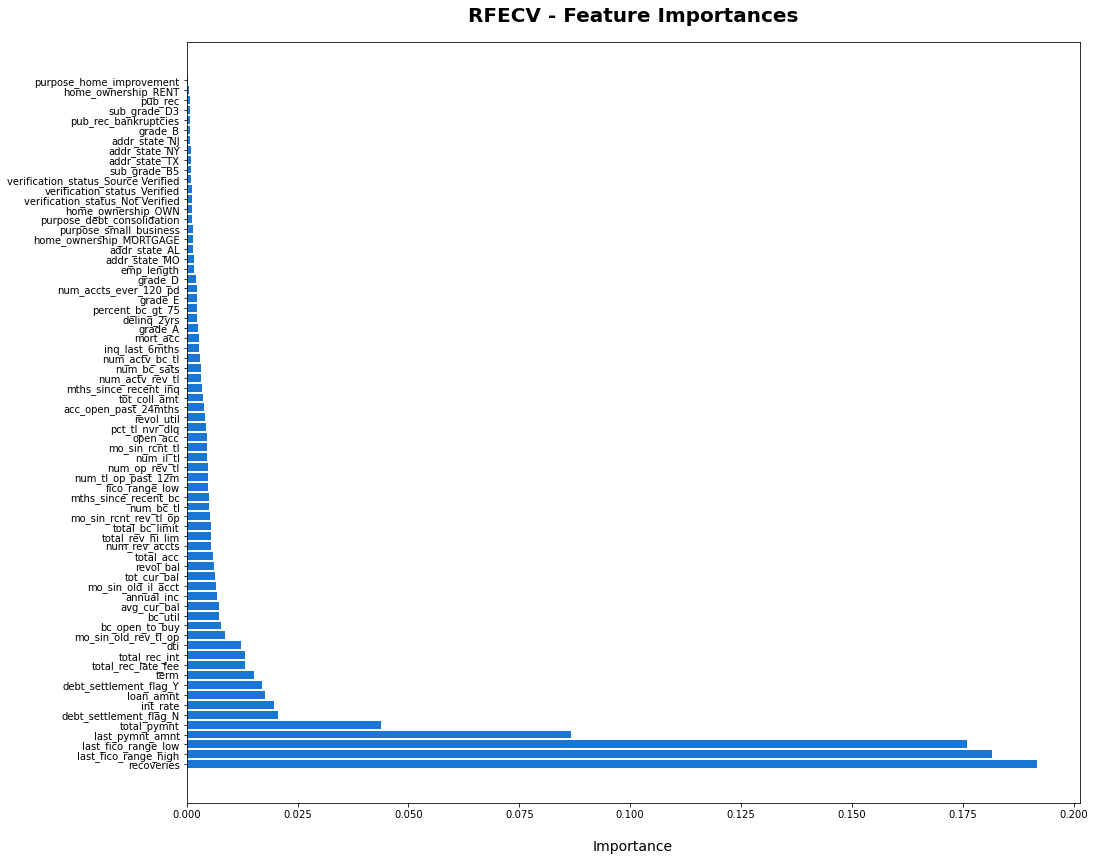

In [71]:

dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()


## 3.7 Saving data

In [72]:
# save the data to a new csv file
acc.to_csv('accept_3_1.csv', index=False)